In [25]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

# Change some figure settings
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '5'}) 
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'font.size': 18})

## Data processing

In [26]:
def distance_modules_to_distance(u):
    # calculate distance in Mpc
    return 10**(1+u/5-6)


def error_propogation_to_distance(u, u_err):
    # follow error propogation to calculate distance err
    return 10**(1+u/5-6)*(math.log(10)/5)*u_err

In [3]:
'''
select galaxies below for measurement:
NGC 925
NGC 1326A
NGC 1365
NGC 1425
NGC 2090
NGC 2541
NGC 3031 (M81)
NGC 3198
NGC 3351
NGC 3621
NGC 4321
NGC 4414
NGC 4535
NGC 7331
'''

'\nselect galaxies below for measurement:\nNGC 925\nNGC 1326A\nNGC 1365\nNGC 1425\nNGC 2090\nNGC 2541\nNGC 3031 (M81)\nNGC 3198\nNGC 3351\nNGC 3621\nNGC 4321\nNGC 4414\nNGC 4535\nNGC 7331\n'

In [7]:
# selected galaxies data from NED database
velocity = [1412, 1725, 1539, 1412, 994, 687, 43, 879, 1128, 1064, 1896, 983, 2299, 490]
velocity_err = [7, 8, 7, 7, 5, 10, 6, 15, 24, 23, 23, 19, 23, 23]
distance_modules = [31.68, 31.02, 31.31, 31.68, 30.37, 30.31, 27.79, 30.63, 29.84, 29.14, 30.72, 31.26, 31.04, 30.71]
distance_modules_err = [0.09, 0.1, 0.06, 0.09, 0.09, 0.09, 0.06, 0.09, 0.4, 0.06, 0.06, 0.09, 0.09, 0.08]

# calculate distance & err from distance modules
distance = [distance_modules_to_distance(e) for e in distance_modules]
distance_err = [error_propogation_to_distance(distance_modules[i], distance_modules_err[i]) \
                for i, _ in enumerate(distance_modules)]

velocity = np.array(velocity)
velocity_err = np.array(velocity_err)

distance = np.array(distance)
distance_err = np.array(distance_err)

In [17]:
print(distance)
print(distance_err)

[21.67704105 15.99558029 18.28100216 21.67704105 11.85768748 11.53453258
  3.61409863 13.36595517  9.28966387  6.72976656 13.93156803 17.86487575
 16.14358557 13.86755829]
[0.89843817 0.73662369 0.50512276 0.89843817 0.49146002 0.47806637
 0.09986124 0.55397248 1.71121932 0.18595032 0.38494345 0.74043714
 0.66909563 0.51089973]


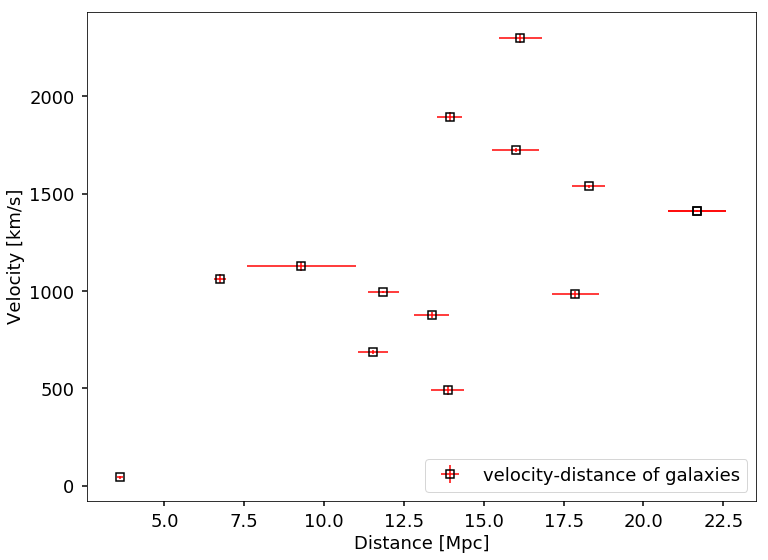

In [27]:
# plot the velocity vs distance
plt.figure(figsize=(12,9))
plt.errorbar(distance, velocity, yerr=velocity_err, xerr=distance_err,
         label='velocity-distance of galaxies',
         marker='s', markersize=8, alpha=1, ls='', lw=1.5, ecolor='r',
         markerfacecolor='none', markeredgecolor='k', markeredgewidth=1.5)

# prettify
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')
plt.legend(loc='lower right', fontsize=18)
plt.savefig("2.png")

## Fitting model to data

### Weighted Least Square Fit

In [22]:
A = np.array(velocity)
ATA = np.dot(A.T, A / (np.array(distance_err)**2))
w = ATA/np.dot(A.T, np.array(distance) / np.array(distance_err)**2)

In [23]:
x = np.linspace(1,22.5,1000)
y = x*w

In [29]:
w

111.13809929863645

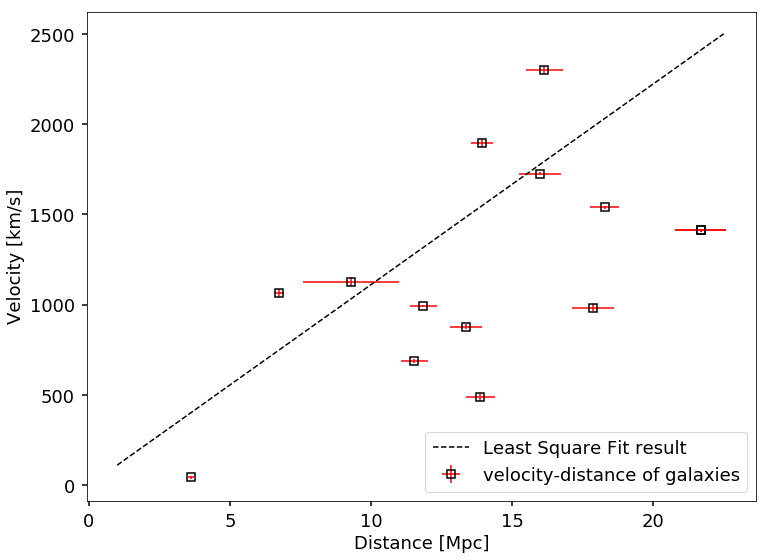

In [28]:
# plot the velocity vs distance
plt.figure(figsize=(12,9))
plt.plot(x, y, linestyle='dashed', color = 'k', label='Least Square Fit result')
plt.errorbar(distance, velocity, yerr=velocity_err, xerr=distance_err,
         label='velocity-distance of galaxies',
         marker='s', markersize=8, alpha=1, ls='', lw=1.5, ecolor='r',
         markerfacecolor='none', markeredgecolor='k', markeredgewidth=1.5)

# prettify
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')
plt.legend(loc='lower right', fontsize=18)

plt.savefig('1.png')

### Max likelihood function

In [11]:
def log_likelihood(theta, x, y, yerr):
    m, log_f = theta
    model = m * x
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [12]:
from scipy.optimize import minimize

np.random.seed(40)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.06, 0])
soln = minimize(nll, initial, args=(np.array(velocity), np.array(distance), np.array(distance_err)))
m_ml, log_f_ml = soln.x
print(soln)
print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

      fun: 47.15519987065455
 hess_inv: array([[8.24221387e-06, 2.36716459e-06],
       [2.36716459e-06, 1.30702438e-04]])
      jac: array([ 2.57492065e-05, -4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 320
      nit: 7
     njev: 77
   status: 2
  success: False
        x: array([0.01816512, 0.03838889])
Maximum likelihood estimates:
m = 0.018
f = 1.039


In [13]:
1/0.018

55.55555555555556

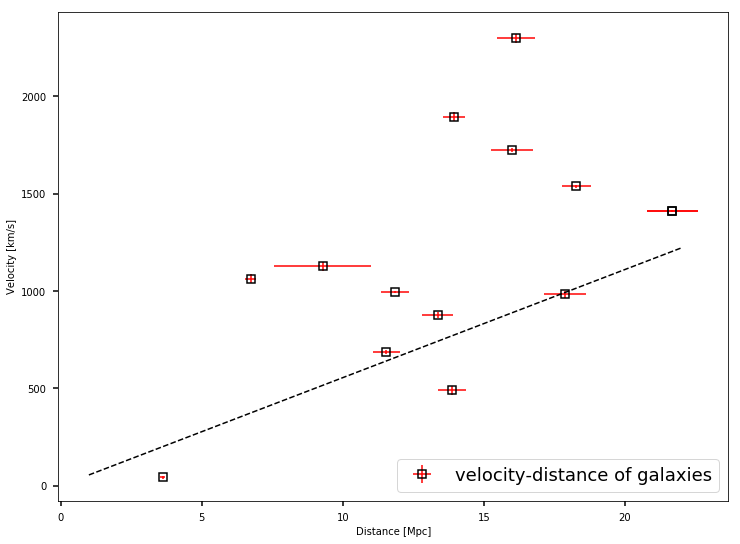

In [14]:
x = np.linspace(1,22,1000)
y = x*55.55

# plot the velocity vs distance
plt.figure(figsize=(12,9))
plt.plot(x, y, linestyle='dashed', color = 'k')
plt.errorbar(distance, velocity, yerr=velocity_err, xerr=distance_err,
         label='velocity-distance of galaxies',
         marker='s', markersize=8, alpha=1, ls='', lw=1.5, ecolor='r',
         markerfacecolor='none', markeredgecolor='k', markeredgewidth=1.5)

# prettify
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')
plt.legend(loc='lower right', fontsize=18)
plt.show()